## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df= pd.read_csv(r"C:\Users\abc\Downloads\train1.csv")

In [3]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17-01-2011,8091,216418,99.0375,111.8625,0,0,20
1,2,17-01-2011,8091,216419,99.0375,99.0375,0,0,28
2,3,17-01-2011,8091,216425,133.9500,133.9500,0,0,19
3,4,17-01-2011,8091,216233,133.9500,133.9500,0,0,44
4,5,17-01-2011,8091,217390,141.0750,141.0750,0,0,52


## EDA and Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [5]:
df.shape

(150150, 9)

In [6]:
df.tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
150145,212638,09-07-2013,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09-07-2013,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09-07-2013,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09-07-2013,9984,547934,141.7875,191.6625,0,1,12
150149,212644,09-07-2013,9984,679023,234.4125,234.4125,0,0,15


In [7]:
df.size

1351350

In [8]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [9]:
null_count  =df.isnull().sum()

In [10]:
null_count

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [11]:
df1 = df.fillna(value=0)
df1

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17-01-2011,8091,216418,99.0375,111.8625,0,0,20
1,2,17-01-2011,8091,216419,99.0375,99.0375,0,0,28
2,3,17-01-2011,8091,216425,133.9500,133.9500,0,0,19
3,4,17-01-2011,8091,216233,133.9500,133.9500,0,0,44
4,5,17-01-2011,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09-07-2013,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09-07-2013,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09-07-2013,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09-07-2013,9984,547934,141.7875,191.6625,0,1,12


In [12]:
df1.isnull().sum().sum()

0

In [13]:
mean_value = df1['total_price'].mean()
mean_value

206.62537487526723

In [14]:
median_value = df1['units_sold'].median()
median_value

35.0

In [15]:
df1.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object

In [16]:
df1["week"]=pd.to_datetime(df1["week"])
df1["day"]=df1["week"].dt.day
df1["weekday"]=df1["week"].dt.day_name()
df1["month"]=df1["week"].dt.month
df1["year"]=df1["week"].dt.year
df1.drop("week",axis = 1, inplace=True)


# this code snippet preprocesses a DataFrame containing a "week" column with datetime values and derives additional columns for day, weekday, month, and year, which can be useful for various time-based analyses. The original "week" column is then dropped from the DataFrame.

C:\Users\abc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\abc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\abc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\abc\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2011' in DD/MM/YYYY format. Provide format or specify infer_

In [17]:
df1.info()
# we have added day,month,year into our dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   store_id         150150 non-null  int64  
 2   sku_id           150150 non-null  int64  
 3   total_price      150150 non-null  float64
 4   base_price       150150 non-null  float64
 5   is_featured_sku  150150 non-null  int64  
 6   is_display_sku   150150 non-null  int64  
 7   units_sold       150150 non-null  int64  
 8   day              150150 non-null  int64  
 9   weekday          150150 non-null  object 
 10  month            150150 non-null  int64  
 11  year             150150 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 13.7+ MB


In [18]:
df1.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,weekday,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,Monday,1,2011
1,2,8091,216419,99.0375,99.0375,0,0,28,17,Monday,1,2011
2,3,8091,216425,133.9500,133.9500,0,0,19,17,Monday,1,2011
3,4,8091,216233,133.9500,133.9500,0,0,44,17,Monday,1,2011
4,5,8091,217390,141.0750,141.0750,0,0,52,17,Monday,1,2011


### Analysis and visualization

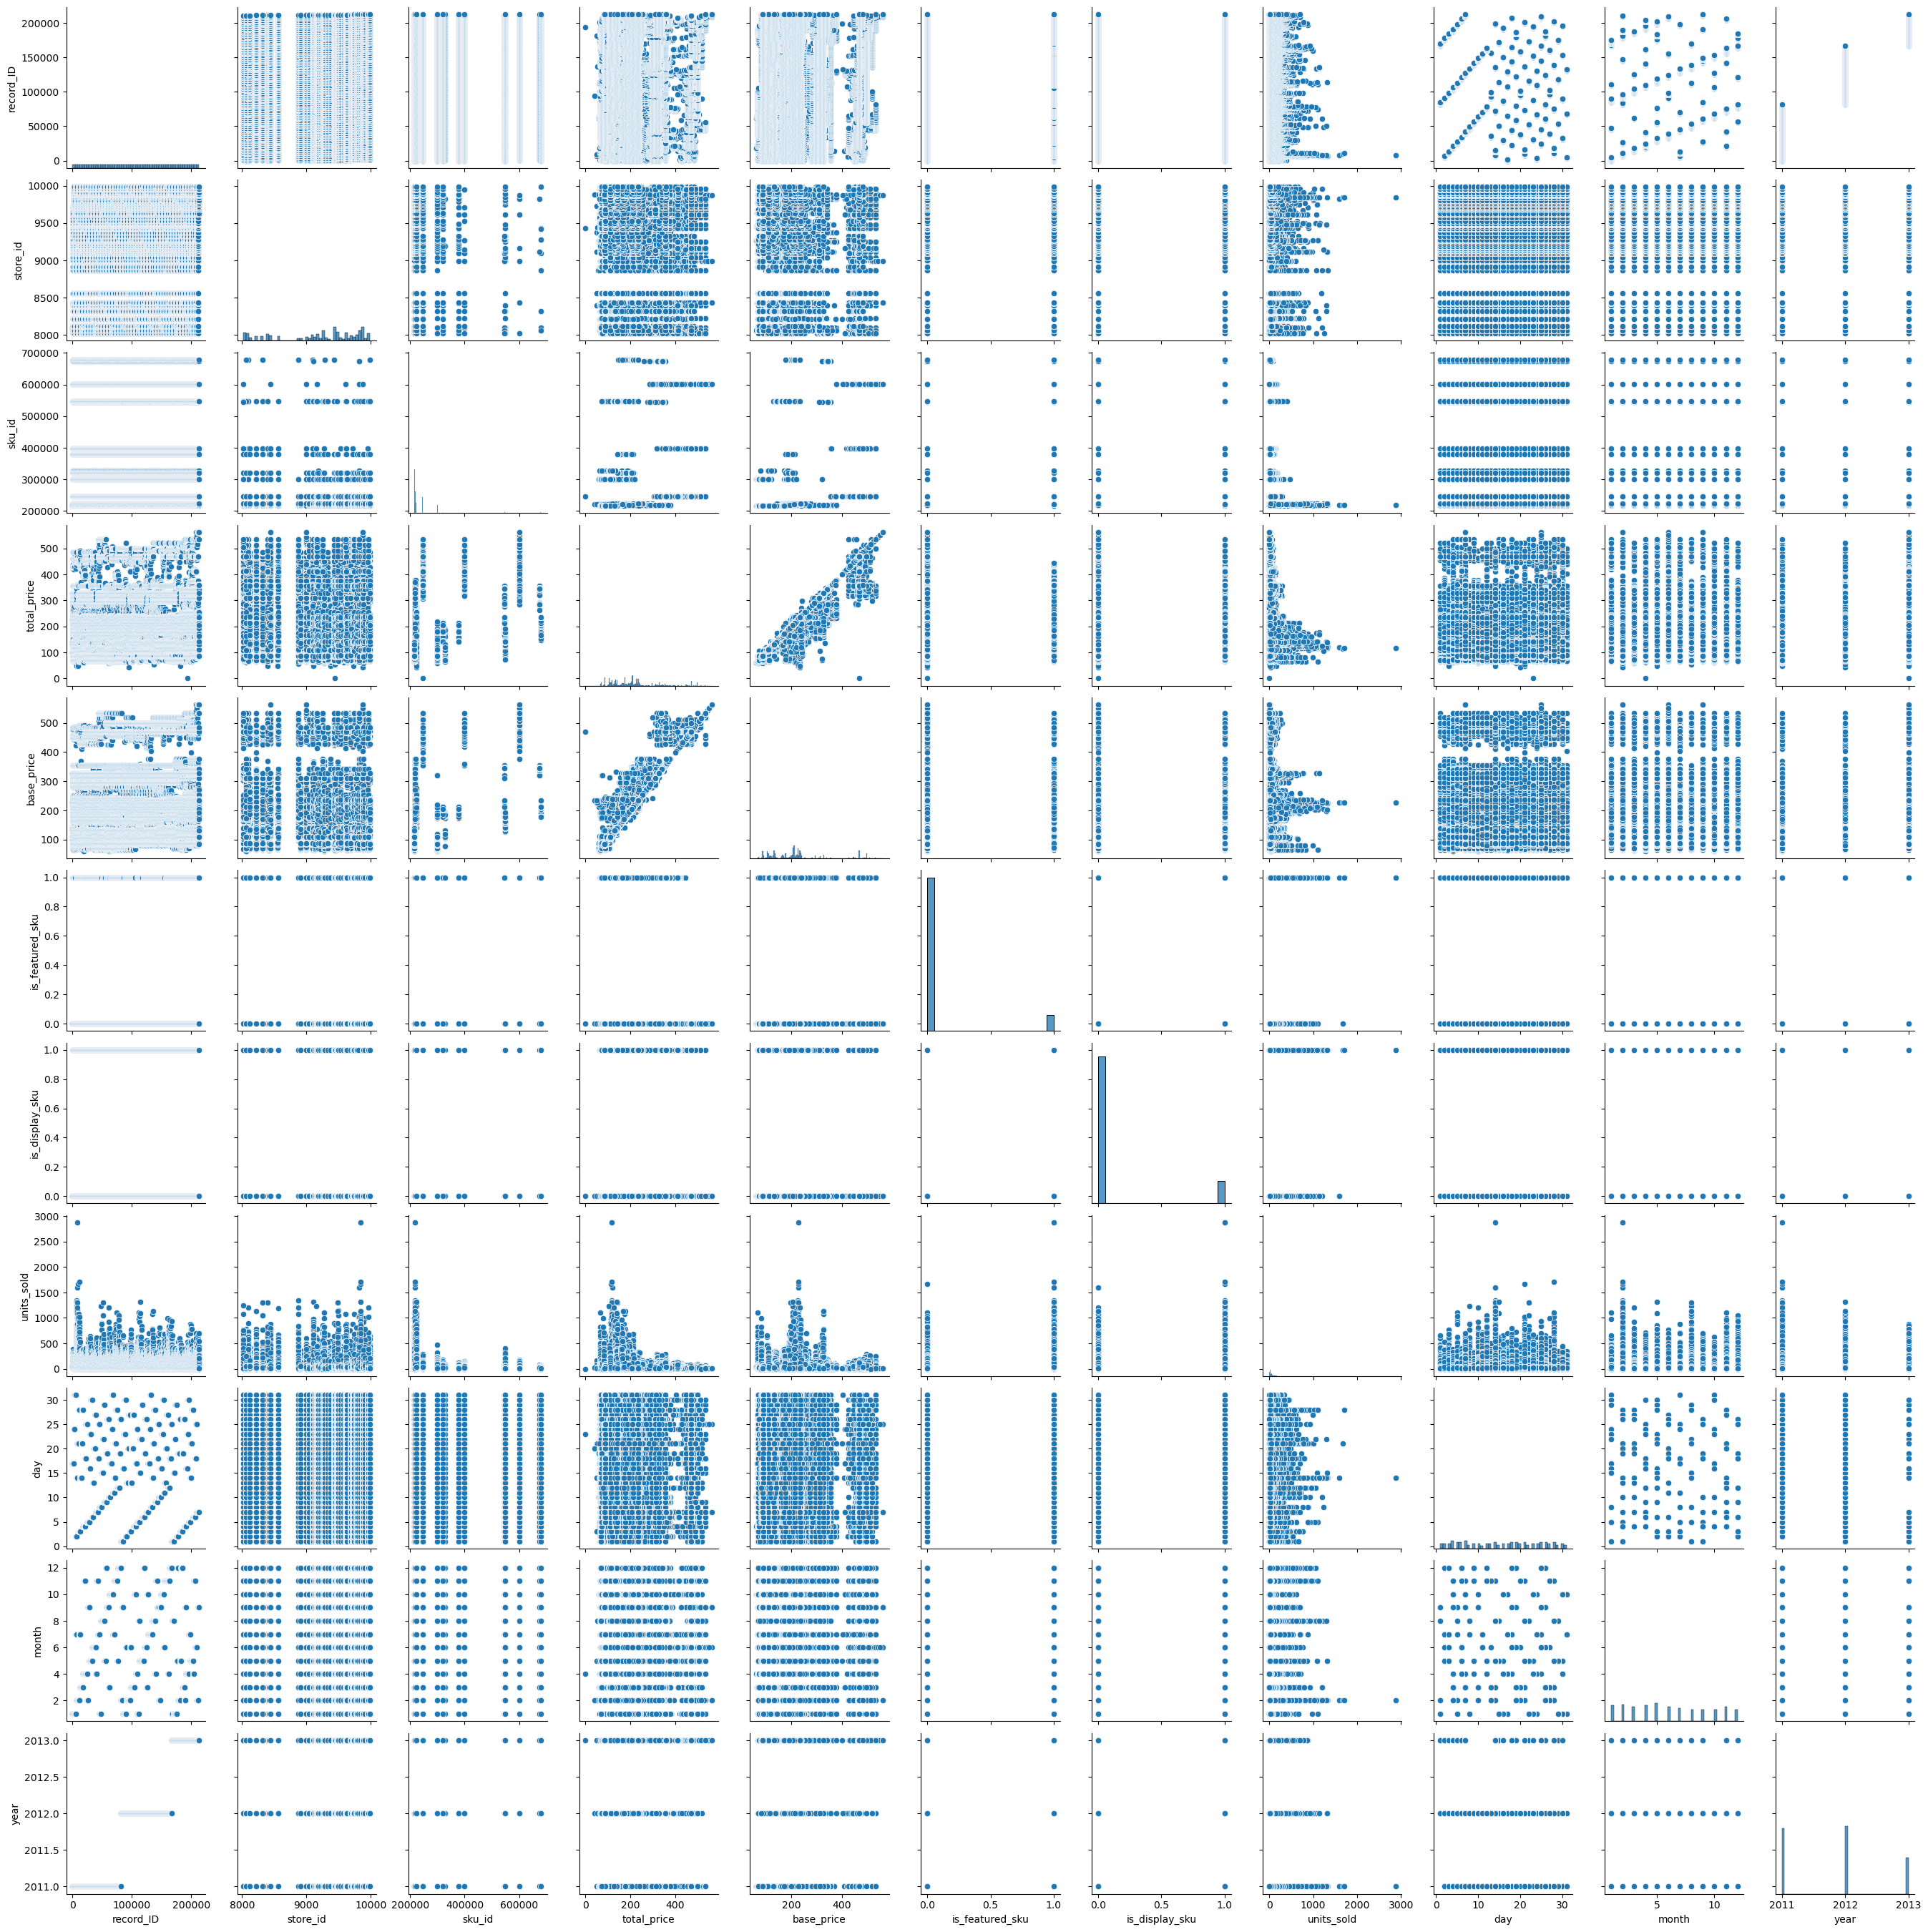

In [19]:
sns.pairplot(df1)

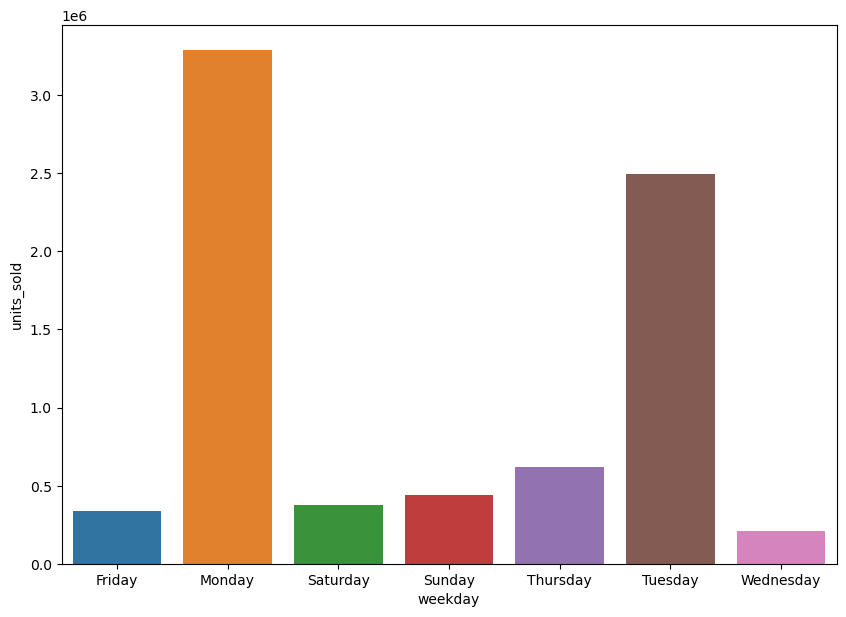

In [20]:
plt.figure(figsize=(10,7))
weekday = df1.groupby("weekday").sum().reset_index()
sns.barplot(x="weekday", y="units_sold",data = weekday)
plt.show()

#The resulting plot will show bars for each weekday, with the height of each bar representing the total units sold on that particular weekday.This type of visualization can help you understand the distribution of sales across different days of the week

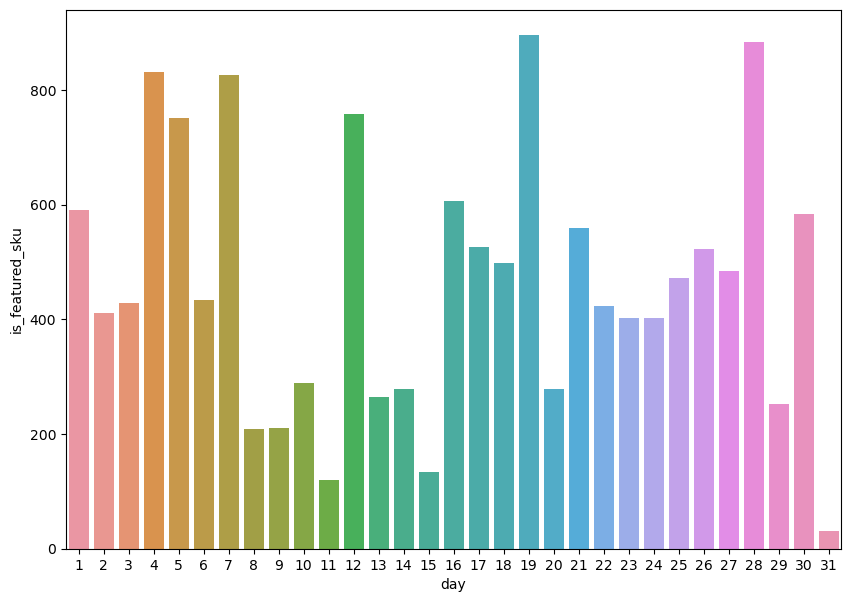

In [21]:
plt.figure(figsize=(10,7))
day = df1.groupby("day").sum().reset_index()
sns.barplot(x="day", y="is_featured_sku",data = day)
plt.show()

#This visualization can help you understand the distribution of featured SKUs across different days of the month.

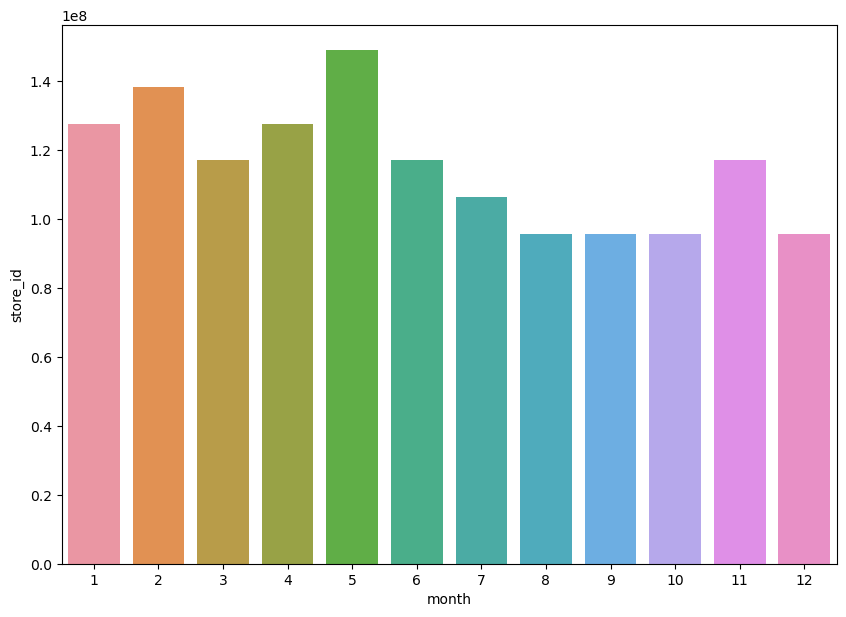

In [22]:
plt.figure(figsize=(10,7))
month = df1.groupby("month").sum().reset_index()
sns.barplot(x="month", y="store_id",data = month)
plt.show()

#The visualization helps us to visualize how the total store IDs are distributed across different months.

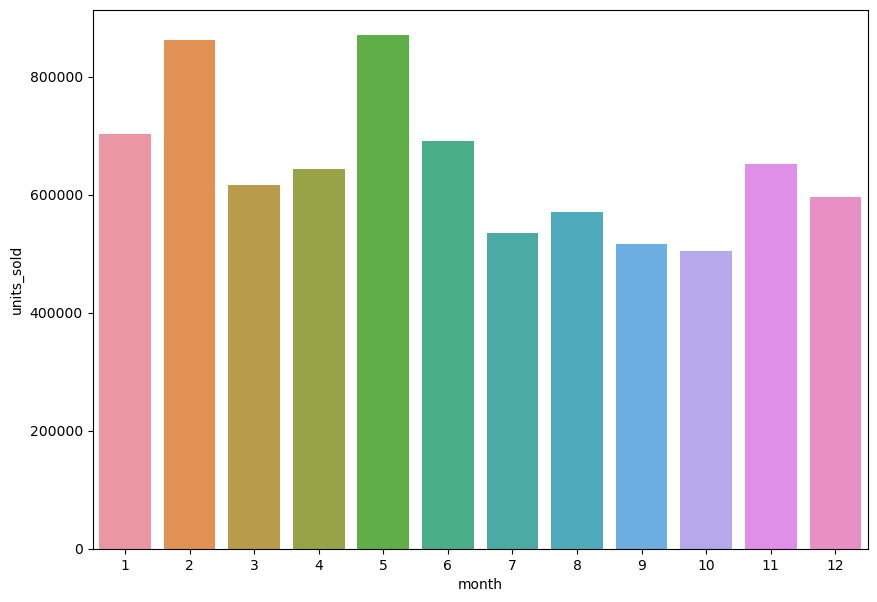

In [23]:
plt.figure(figsize=(10,7))
month = df1.groupby("month").sum().reset_index()
sns.barplot(x="month", y="units_sold",data = month)
plt.show()

# This visualization helps us to understand the distribution of total units sold across different months.

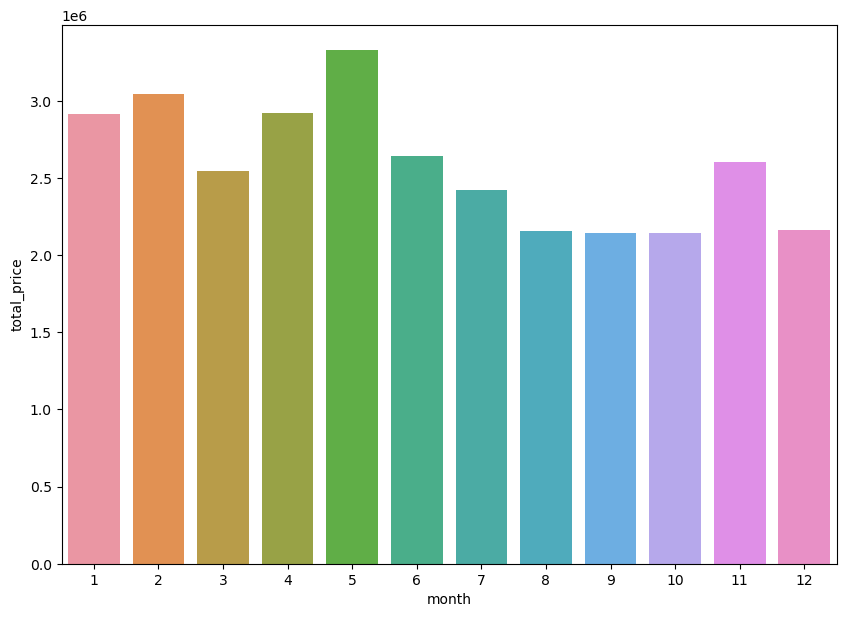

In [24]:
plt.figure(figsize=(10,7))
month = df1.groupby("month").sum().reset_index()
sns.barplot(x="month", y="total_price",data = month)
plt.show()

#This visualization helps us to understand how the total prices vary across different months.

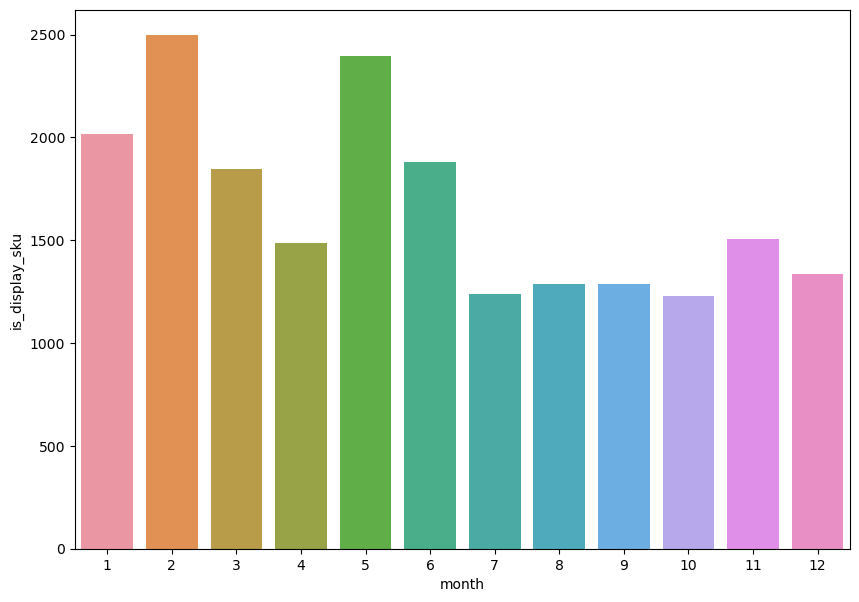

In [25]:
plt.figure(figsize=(10,7))
month = df1.groupby("month").sum().reset_index()
sns.barplot(x="month", y="is_display_sku",data = month)
plt.show()

#This visualization helps us to understand the distribution of products designated as display SKUs across different months.

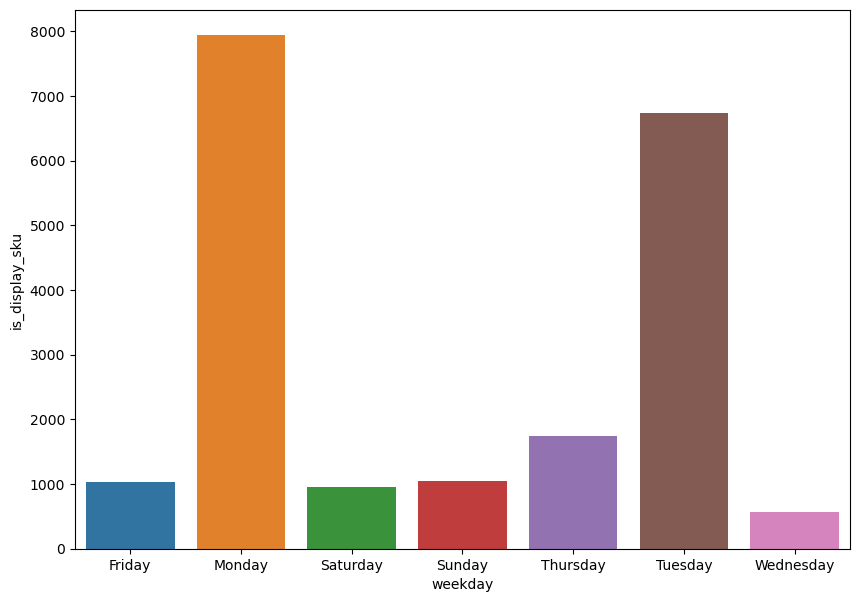

In [26]:
plt.figure(figsize=(10,7))
weekday = df1.groupby("weekday").sum().reset_index()
sns.barplot(x="weekday", y="is_display_sku",data = weekday)
plt.show()

# This visualization is useful for visualizing how the "is_display_sku" values vary across different weekdays.

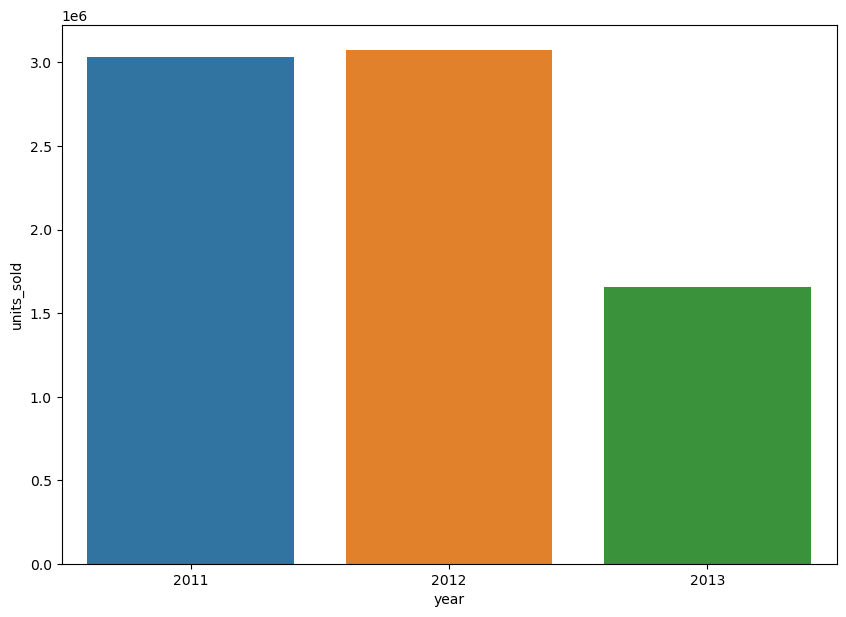

In [27]:
plt.figure(figsize=(10,7))
year = df1.groupby("year").sum().reset_index()
sns.barplot(x="year", y="units_sold",data = year)
plt.show()

#The code generates a bar plot that provides a visual representation of the total units sold for each year in your dataset, allowing you to observe trends or patterns in unit sales over time.

<Figure size 4000x600 with 0 Axes>

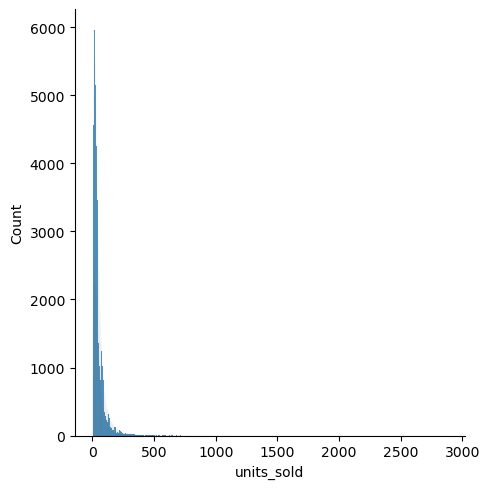

In [45]:
plt.figure(figsize=(40,6))
sns.displot(df1["units_sold"])
plt.show()
# we can see the tail is in the right side ,which indicates a positively skewed distribution.

<Figure size 4000x600 with 0 Axes>

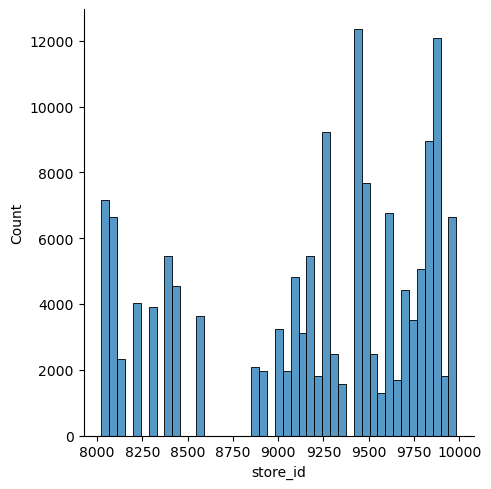

In [46]:
plt.figure(figsize=(40,6))
sns.displot(df1["store_id"])
plt.show()
# here the distribution is normalized.In a normalized distribution, the data is symmetrically distributed, meaning that the left and right sides of the central point (mean or median) are roughly mirror images of each other.

<Figure size 4000x600 with 0 Axes>

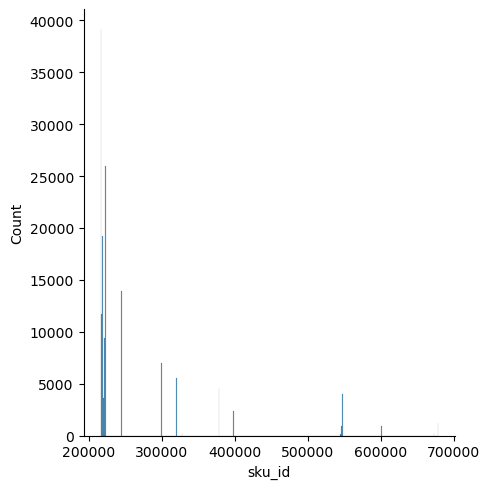

In [47]:
plt.figure(figsize=(40,6))
sns.displot(df1["sku_id"])
plt.show()
# this also shows a positive skewed distribution which helps us to understanding the influence of extreme high values on summary statistics and modeling.

In [48]:
df1.skew().sort_values(ascending=True)

C:\Users\abc\AppData\Local\Temp\ipykernel_9836\2543688446.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew().sort_values(ascending=True)


store_id          -0.636176
record_ID          0.001126
day                0.007563
month              0.166137
year               0.291034
base_price         1.208992
total_price        1.250506
is_display_sku     2.158996
is_featured_sku    2.750438
sku_id             3.048709
units_sold         6.114996
dtype: float64

In [49]:
df1.drop_duplicates(inplace=True)
df1

#This code removes duplicate rows from the DataFrame df1 and displays the modified DataFrame with duplicate entries removed. It ensures that the DataFrame contains only unique data records.

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,weekday,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,Monday,1,2011
1,2,8091,216419,99.0375,99.0375,0,0,28,17,Monday,1,2011
2,3,8091,216425,133.9500,133.9500,0,0,19,17,Monday,1,2011
3,4,8091,216233,133.9500,133.9500,0,0,44,17,Monday,1,2011
4,5,8091,217390,141.0750,141.0750,0,0,52,17,Monday,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,7,Saturday,9,2013
150146,212639,9984,223153,235.8375,235.8375,0,0,30,7,Saturday,9,2013
150147,212642,9984,245338,357.6750,483.7875,1,1,31,7,Saturday,9,2013
150148,212643,9984,547934,141.7875,191.6625,0,1,12,7,Saturday,9,2013


# Outliers

In [50]:
df1.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
count,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.625375,219.425927,0.095611,0.133200,51.674206,15.700000,6.130769,2011.830769
std,61386.037861,615.591445,85547.306447,103.309549,110.961712,0.294058,0.339792,60.207904,8.944861,3.438232,0.755887
min,1.000000,8023.000000,216233.000000,0.000000,61.275000,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000,7.000000,3.000000,2011.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000,16.000000,6.000000,2012.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000,24.000000,9.000000,2012.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000,31.000000,12.000000,2013.000000


### Using IQR Method

In [51]:
q1=df1['total_price'].quantile(0.25)
q3= df1['total_price'].quantile(0.75)
iqr = q3-q1

In [52]:
q1,q3,iqr

(130.3875, 233.7, 103.3125)

In [53]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit,upper_limit


#this code calculates upper and lower limits for outlier detection based on the IQR method. Values falling outside of these limits are often considered outliers and may warrant further investigation in data analysis and statistical modeling.

(-24.58125000000001, 388.66875)

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


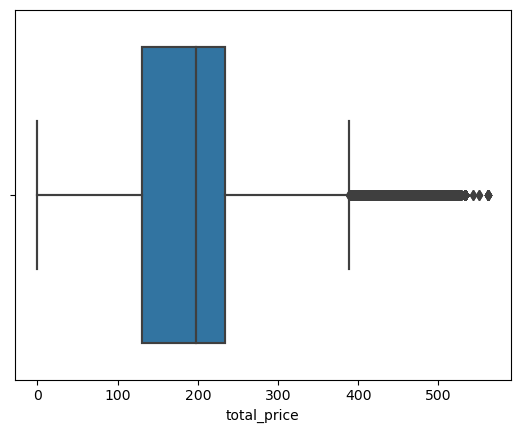

In [55]:
sns.boxplot(df1['total_price'])
plt.show()

In [56]:
#finding the outliers
df1.loc[(df1['total_price']>upper_limit) | (df1['total_price'] < lower_limit)]

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,weekday,month,year
24,37,8095,245387,427.5000,448.1625,1,1,50,17,Monday,1,2011
25,38,8095,245338,429.6375,458.1375,1,0,62,17,Monday,1,2011
45,61,8094,398721,426.7875,448.1625,1,0,11,17,Monday,1,2011
46,62,8094,245387,426.7875,448.8750,1,0,13,17,Monday,1,2011
47,63,8094,245338,426.7875,448.1625,1,0,28,17,Monday,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
149321,211454,8991,600934,562.1625,562.1625,0,0,4,7,Saturday,9,2013
149433,211617,9164,600934,533.6625,533.6625,0,0,7,7,Saturday,9,2013
149788,212125,9611,600934,533.6625,533.6625,0,0,6,7,Saturday,9,2013
149944,212361,9823,600934,533.6625,533.6625,0,0,2,7,Saturday,9,2013


In [57]:
#trimmimg the outlier
new_df = df1.loc[(df1['total_price']>upper_limit) | (df1['total_price'] < lower_limit)]
print('before removing outliers:',len(df1))
print('after removing outliers:',len(new_df))
print('outliers:',len(df1)-len(new_df))

before removing outliers: 150150
after removing outliers: 12028
outliers: 138122


In [58]:
new_df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,weekday,month,year
24,37,8095,245387,427.5000,448.1625,1,1,50,17,Monday,1,2011
25,38,8095,245338,429.6375,458.1375,1,0,62,17,Monday,1,2011
45,61,8094,398721,426.7875,448.1625,1,0,11,17,Monday,1,2011
46,62,8094,245387,426.7875,448.8750,1,0,13,17,Monday,1,2011
47,63,8094,245338,426.7875,448.1625,1,0,28,17,Monday,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
149321,211454,8991,600934,562.1625,562.1625,0,0,4,7,Saturday,9,2013
149433,211617,9164,600934,533.6625,533.6625,0,0,7,7,Saturday,9,2013
149788,212125,9611,600934,533.6625,533.6625,0,0,6,7,Saturday,9,2013
149944,212361,9823,600934,533.6625,533.6625,0,0,2,7,Saturday,9,2013


C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


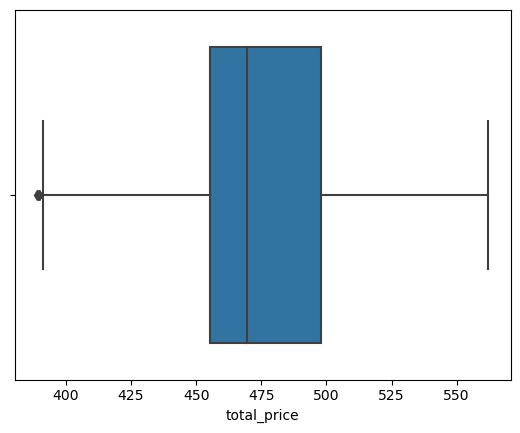

In [63]:
sns.boxplot(new_df['total_price'])
plt.show()

## Data Processing

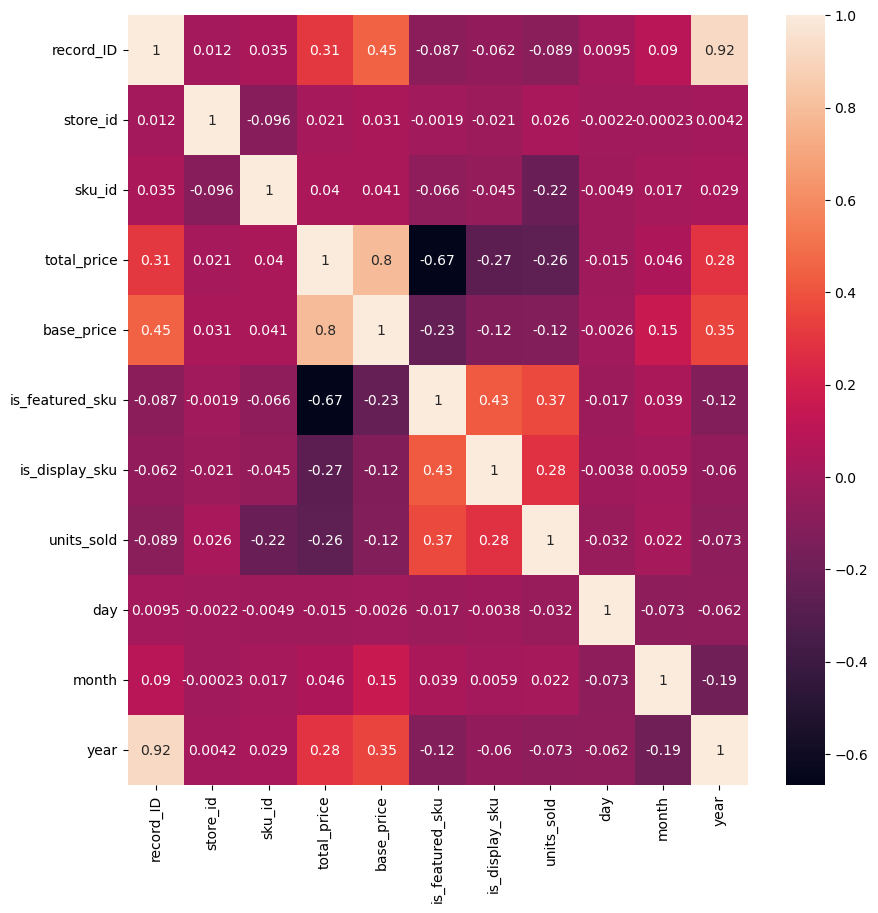

In [65]:
#he code creates a heatmap to visualize the correlations between variables in the DataFrame new_df
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(), annot=True)
plt.show()

# Multicollinearity

### Multicollinearity is a statistical phenomenon that occurs in multiple regression analysis when two or more independent variables in a regression model are highly correlated with each other.Detecting and addressing multicollinearity is crucial to ensure that the results of regression analysis are valid and that the model can make accurate predictions.

In [66]:
new_df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,weekday,month,year
24,37,8095,245387,427.5000,448.1625,1,1,50,17,Monday,1,2011
25,38,8095,245338,429.6375,458.1375,1,0,62,17,Monday,1,2011
45,61,8094,398721,426.7875,448.1625,1,0,11,17,Monday,1,2011
46,62,8094,245387,426.7875,448.8750,1,0,13,17,Monday,1,2011
47,63,8094,245338,426.7875,448.1625,1,0,28,17,Monday,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
149321,211454,8991,600934,562.1625,562.1625,0,0,4,7,Saturday,9,2013
149433,211617,9164,600934,533.6625,533.6625,0,0,7,7,Saturday,9,2013
149788,212125,9611,600934,533.6625,533.6625,0,0,6,7,Saturday,9,2013
149944,212361,9823,600934,533.6625,533.6625,0,0,2,7,Saturday,9,2013


In [67]:
def get_vif(new_df):
    vif = pd.DataFrame()
    vif['variables'] =new_df.columns
    vif["VIF"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]
    
    
    return vif


 #this function is used to compute the VIF values for variables which is a measure of multicollinearity in a regression analysis.

In [49]:
not_for_vif = ["day","month","year","week","units_sold","total_price","store_id"]
get_vif (new_df[[i for i in new_df.describe().columns if i not in not_for_vif]])

#the code calculates the VIF values for a subset of columns in the new_df DataFrame, excluding specific columns specified in the not_for_vif list.This is typically done to assess multicollinearity among a selected set of predictor variables while excluding certain variables from consideration.

,variables,VIF
0,record_ID,3.733649
1,sku_id,10.087299
2,base_price,13.390997
3,is_featured_sku,1.338906
4,is_display_sku,1.347554


In [50]:
not_for_vif = ["day","month","year","week","units_sold","store_id"]
get_vif (new_df[[i for i in new_df.describe().columns if i not in not_for_vif]])


,variables,VIF
0,record_ID,3.917876
1,sku_id,10.101908
2,total_price,2029.443316
3,base_price,2121.804624
4,is_featured_sku,3.940140
5,is_display_sku,1.364343


In [51]:
not_for_vif = ["day","month","year","week","units_sold","base_price","store_id"]
get_vif (new_df[[i for i in new_df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,record_ID,3.666030
1,sku_id,9.991481
2,total_price,12.808092
3,is_featured_sku,1.327318
4,is_display_sku,1.349561


In [52]:
new_df.drop(["base_price"], axis= 1, inplace= True)

# After executing this code, the "base_price" column will be removed from the new_df DataFrame, and the DataFrame will be modified accordingly.


C:\Users\abc\AppData\Local\Temp\ipykernel_7564\2409796326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(["base_price"], axis= 1, inplace= True)


In [53]:
new_df
# the dataframe has modified accordingly.

,record_ID,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,day,weekday,month,year
24,37,8095,245387,427.5000,1,1,50,17,Monday,1,2011
25,38,8095,245338,429.6375,1,0,62,17,Monday,1,2011
45,61,8094,398721,426.7875,1,0,11,17,Monday,1,2011
46,62,8094,245387,426.7875,1,0,13,17,Monday,1,2011
47,63,8094,245338,426.7875,1,0,28,17,Monday,1,2011
...,...,...,...,...,...,...,...,...,...,...,...
149321,211454,8991,600934,562.1625,0,0,4,7,Saturday,9,2013
149433,211617,9164,600934,533.6625,0,0,7,7,Saturday,9,2013
149788,212125,9611,600934,533.6625,0,0,6,7,Saturday,9,2013
149944,212361,9823,600934,533.6625,0,0,2,7,Saturday,9,2013


## Encoding

In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12028 entries, 24 to 150011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        12028 non-null  int64  
 1   store_id         12028 non-null  int64  
 2   sku_id           12028 non-null  int64  
 3   total_price      12028 non-null  float64
 4   is_featured_sku  12028 non-null  int64  
 5   is_display_sku   12028 non-null  int64  
 6   units_sold       12028 non-null  int64  
 7   day              12028 non-null  int64  
 8   weekday          12028 non-null  object 
 9   month            12028 non-null  int64  
 10  year             12028 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 1.1+ MB


In [55]:
new_df.shape

(12028, 11)

In [56]:
new_df.head()

,record_ID,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,day,weekday,month,year
24,37,8095,245387,427.5000,1,1,50,17,Monday,1,2011
25,38,8095,245338,429.6375,1,0,62,17,Monday,1,2011
45,61,8094,398721,426.7875,1,0,11,17,Monday,1,2011
46,62,8094,245387,426.7875,1,0,13,17,Monday,1,2011
47,63,8094,245338,426.7875,1,0,28,17,Monday,1,2011


In [57]:
cat_features = ["weekday"]

#: This is a list variable that typically holds the names or labels of categorical features or columns in a dataset.

In [58]:
new_df["weekday"].value_counts()

# this code is used to obtain a count of unique values in the "weekday" column of the DataFrame new_df which helps to understanding the distribution of weekdays in your data.

Monday       5271
Tuesday      3510
Thursday      938
Sunday        780
Saturday      724
Friday        409
Wednesday     396
Name: weekday, dtype: int64

In [59]:
df_encoded = pd.get_dummies(new_df, columns=['weekday'], prefix=['weekday'])

# here we have performed one-hot encoding on the "weekday" column in the DataFrame.It helps us to maintain the categorical information while making it suitable for machine learning algorithms that require numerical inputs

In [60]:
df_encoded

# categorical variables has changed into numerical values.

,record_ID,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,day,month,year,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
24,37,8095,245387,427.5000,1,1,50,17,1,2011,0,1,0,0,0,0,0
25,38,8095,245338,429.6375,1,0,62,17,1,2011,0,1,0,0,0,0,0
45,61,8094,398721,426.7875,1,0,11,17,1,2011,0,1,0,0,0,0,0
46,62,8094,245387,426.7875,1,0,13,17,1,2011,0,1,0,0,0,0,0
47,63,8094,245338,426.7875,1,0,28,17,1,2011,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149321,211454,8991,600934,562.1625,0,0,4,7,9,2013,0,0,1,0,0,0,0
149433,211617,9164,600934,533.6625,0,0,7,7,9,2013,0,0,1,0,0,0,0
149788,212125,9611,600934,533.6625,0,0,6,7,9,2013,0,0,1,0,0,0,0
149944,212361,9823,600934,533.6625,0,0,2,7,9,2013,0,0,1,0,0,0,0


In [61]:
df_encoded.info()

#here we get the information of our new dataframe "df_encoded".

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12028 entries, 24 to 150011
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_ID          12028 non-null  int64  
 1   store_id           12028 non-null  int64  
 2   sku_id             12028 non-null  int64  
 3   total_price        12028 non-null  float64
 4   is_featured_sku    12028 non-null  int64  
 5   is_display_sku     12028 non-null  int64  
 6   units_sold         12028 non-null  int64  
 7   day                12028 non-null  int64  
 8   month              12028 non-null  int64  
 9   year               12028 non-null  int64  
 10  weekday_Friday     12028 non-null  uint8  
 11  weekday_Monday     12028 non-null  uint8  
 12  weekday_Saturday   12028 non-null  uint8  
 13  weekday_Sunday     12028 non-null  uint8  
 14  weekday_Thursday   12028 non-null  uint8  
 15  weekday_Tuesday    12028 non-null  uint8  
 16  weekday_Wednesday  1

In [62]:
df_encoded = pd.concat([new_df,df_encoded], axis=1)

#After executing this code, df_encoded will contain the combined DataFrame with the original columns from new_df and the additional columns created during one-hot encoding.

In [63]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12028 entries, 24 to 150011
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_ID          12028 non-null  int64  
 1   store_id           12028 non-null  int64  
 2   sku_id             12028 non-null  int64  
 3   total_price        12028 non-null  float64
 4   is_featured_sku    12028 non-null  int64  
 5   is_display_sku     12028 non-null  int64  
 6   units_sold         12028 non-null  int64  
 7   day                12028 non-null  int64  
 8   weekday            12028 non-null  object 
 9   month              12028 non-null  int64  
 10  year               12028 non-null  int64  
 11  record_ID          12028 non-null  int64  
 12  store_id           12028 non-null  int64  
 13  sku_id             12028 non-null  int64  
 14  total_price        12028 non-null  float64
 15  is_featured_sku    12028 non-null  int64  
 16  is_display_sku     1

In [64]:
df_encoded.drop(["weekday"], axis = 1 , inplace= True)

# we will drop weekday from the dataframe as it has categorical value.

In [65]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12028 entries, 24 to 150011
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_ID          12028 non-null  int64  
 1   store_id           12028 non-null  int64  
 2   sku_id             12028 non-null  int64  
 3   total_price        12028 non-null  float64
 4   is_featured_sku    12028 non-null  int64  
 5   is_display_sku     12028 non-null  int64  
 6   units_sold         12028 non-null  int64  
 7   day                12028 non-null  int64  
 8   month              12028 non-null  int64  
 9   year               12028 non-null  int64  
 10  record_ID          12028 non-null  int64  
 11  store_id           12028 non-null  int64  
 12  sku_id             12028 non-null  int64  
 13  total_price        12028 non-null  float64
 14  is_featured_sku    12028 non-null  int64  
 15  is_display_sku     12028 non-null  int64  
 16  units_sold         1

In [66]:
df_encoded.head()

## our data is ready to perform machine learning algorithm with all the numeric values.

,record_ID,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,day,month,year,...,day,month,year,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
24,37,8095,245387,427.5000,1,1,50,17,1,2011,...,17,1,2011,0,1,0,0,0,0,0
25,38,8095,245338,429.6375,1,0,62,17,1,2011,...,17,1,2011,0,1,0,0,0,0,0
45,61,8094,398721,426.7875,1,0,11,17,1,2011,...,17,1,2011,0,1,0,0,0,0,0
46,62,8094,245387,426.7875,1,0,13,17,1,2011,...,17,1,2011,0,1,0,0,0,0,0
47,63,8094,245338,426.7875,1,0,28,17,1,2011,...,17,1,2011,0,1,0,0,0,0,0


In [67]:
df_encoded.tail()

,record_ID,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,day,month,year,...,day,month,year,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
149321,211454,8991,600934,562.1625,0,0,4,7,9,2013,...,7,9,2013,0,0,1,0,0,0,0
149433,211617,9164,600934,533.6625,0,0,7,7,9,2013,...,7,9,2013,0,0,1,0,0,0,0
149788,212125,9611,600934,533.6625,0,0,6,7,9,2013,...,7,9,2013,0,0,1,0,0,0,0
149944,212361,9823,600934,533.6625,0,0,2,7,9,2013,...,7,9,2013,0,0,1,0,0,0,0
150011,212452,9872,600934,562.1625,0,0,2,7,9,2013,...,7,9,2013,0,0,1,0,0,0,0


In [68]:
df_encoded.shape

(12028, 27)

## Split data for Training and Testing

In [69]:
X = df_encoded.drop("units_sold", axis=1)
Y = df_encoded ["units_sold"]

X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.2,random_state =2023)

print("Shape of X_train : " , X_train.shape)
print("Shape of Y_train : " , Y_train.shape)
print("Shape of X_test : " ,  X_test.shape)
print("Shape of Y_test : " ,  Y_test.shape)

# this code prepares the data for machine learning by splitting it into training and testing sets, with the features stored in X and the target variable stored in Y. The shapes of the resulting sets are printed for informational purposes.

Shape of X_train :  (9622, 25)
Shape of Y_train :  (9622, 2)
Shape of X_test :  (2406, 25)
Shape of Y_test :  (2406, 2)


## Scaling

In [70]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train_original = sc.inverse_transform(X_train)

#The code standardizes features in the training and testing sets, ensuring they have a mean of 0 and a standard deviation of 1, a common preprocessing step to make features comparable and reduce the impact of scale differences in machine learning.

In [71]:
sc.mean_

# the dataframe is changed to numpy arrays.

array([9.65369949e+04, 9.13380877e+03, 2.86063302e+05, 4.70370848e+02,
       8.76117231e-02, 9.59260029e-02, 1.58662440e+01, 5.92485970e+00,
       2.01173394e+03, 9.65369949e+04, 9.13380877e+03, 2.86063302e+05,
       4.70370848e+02, 8.76117231e-02, 9.59260029e-02, 1.58662440e+01,
       5.92485970e+00, 2.01173394e+03, 3.44003326e-02, 4.38578258e-01,
       6.04863854e-02, 6.40199543e-02, 7.80503014e-02, 2.90895864e-01,
       3.35689046e-02])

In [72]:
sc.scale_

array([6.15559348e+04, 6.42420122e+02, 9.32111050e+04, 3.09035459e+01,
       2.82729392e-01, 2.94489736e-01, 8.99971625e+00, 3.51761127e+00,
       7.43075440e-01, 6.15559348e+04, 6.42420122e+02, 9.32111050e+04,
       3.09035459e+01, 2.82729392e-01, 2.94489736e-01, 8.99971625e+00,
       3.51761127e+00, 7.43075440e-01, 1.82255177e-01, 4.96213028e-01,
       2.38385785e-01, 2.44788480e-01, 2.68250726e-01, 4.54175583e-01,
       1.80116721e-01])

# Training Model

## Linear Regression Model

In [73]:
lr= LinearRegression()
lr.fit(X_train,Y_train)

#the code initializes a Linear Regression model and trains it on the given training data to create a predictive model based on the linear relationship between the independent and dependent variables.

LinearRegression()

In [74]:
Y_pred = lr.predict(X_test)

# this code allows us to use a trained Linear Regression model to make predictions on new or unseen data (X_test) and stores those predictions in the Y_pred variable for further analysis or evaluation of the model's performance.

In [75]:
Y_pred

# this code evaluates model prediction .

array([[15.08008613, 15.08008613],
       [14.64540527, 14.64540527],
       [19.60473428, 19.60473428],
       ...,
       [11.96901088, 11.96901088],
       [16.69450525, 16.69450525],
       [13.75151191, 13.75151191]])

## Model Evaluation

In [76]:
MSE = mean_squared_error(Y_test,Y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(Y_test,Y_pred)
R2 = r2_score(Y_test,Y_pred)
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

#These metrics help evaluate the model's performance and provide insights into how well it is making predictions on the test data. Lower MSE, RMSE, and MAE values and a higher R2 score typically indicate better model performance.

MSE : 115.09819209396397
RMSE : 10.728382547894345
MAE : 7.839352130667539
R2 : 0.21550755573516


In [77]:
def get_metrics(Y_true,Y_pred, model_name):
    MSE = mean_squared_error(Y_test,Y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(Y_test,Y_pred)
    R2 = r2_score(Y_test,Y_pred)
    print(f"{model_name} : ['MSE': {round(MSE,3)}, 'RMSE' :{round(RMSE,3)},'MAE' :{round(MAE,3)}, 'R2': {round(R2,3)}]")
    
#This function is designed to be reusable, allowing you to easily evaluate different machine learning models by passing their true and predicted values along with a name or identifier for the model. It provides a convenient way to compare the performance of various models using standardized metrics.

In [78]:
get_metrics(Y_test,Y_pred, "LinearRegression")

#It calculates and prints various regression evaluation metrics for the Linear Regression model.

LinearRegression : ['MSE': 115.098, 'RMSE' :10.728,'MAE' :7.839, 'R2': 0.216]


# Train Multiple Models

In [79]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#These import statements provide access to a variety of regression algorithms and preprocessing tools, allowing us to experiment with different models and techniques for your regression tasks.

In [80]:
rir=Ridge().fit(X_train, Y_train)
Y_pred_rir =rir.predict(X_test)

lar =Lasso().fit(X_train, Y_train)
Y_pred_lar =lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_r = LinearRegression().fit(X_train_poly,Y_train)
Y_pred_poly = poly_r.predict(X_test_poly)




knnr =  KNeighborsRegressor().fit(X_train,Y_train)
Y_pred_knnr = knnr.predict(X_test)


knnr =  KNeighborsRegressor().fit(X_train,Y_train)
Y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train,Y_train)
Y_pred_dtr = dtr.predict(X_test)


rfr = RandomForestRegressor().fit(X_train,Y_train)
Y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train,Y_train)
Y_pred_xgbr = xgbr.predict(X_test)

#this code snippet trains multiple regression models (Ridge, Lasso, Polynomial Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and XGBoost) on the training data and makes predictions on the test data for each of these models

In [81]:
get_metrics(Y_test,Y_pred_rir,"Ridge")
get_metrics(Y_test,Y_pred_lar,"Lasso")
get_metrics(Y_test,Y_pred_poly,"PolynomialFeatures")
get_metrics(Y_test,Y_pred_knnr,"KNeighborsRegressor")
get_metrics(Y_test,Y_pred_dtr,"DecisionTreeRegressor")
get_metrics(Y_test,Y_pred_rfr,"RandomForestRegressor")
get_metrics(Y_test,Y_pred_xgbr,"XGBRegressor")

#final prediction of our model.

Ridge : ['MSE': 115.098, 'RMSE' :10.728,'MAE' :7.839, 'R2': 0.216]
Lasso : ['MSE': 120.364, 'RMSE' :10.971,'MAE' :7.977, 'R2': 0.18]
PolynomialFeatures : ['MSE': 103.283, 'RMSE' :10.163,'MAE' :7.421, 'R2': 0.296]
KNeighborsRegressor : ['MSE': 110.775, 'RMSE' :10.525,'MAE' :7.61, 'R2': 0.245]
DecisionTreeRegressor : ['MSE': 119.755, 'RMSE' :10.943,'MAE' :7.785, 'R2': 0.184]
RandomForestRegressor : ['MSE': 62.976, 'RMSE' :7.936,'MAE' :5.7, 'R2': 0.571]
XGBRegressor : ['MSE': 48.792, 'RMSE' :6.985,'MAE' :5.206, 'R2': 0.667]


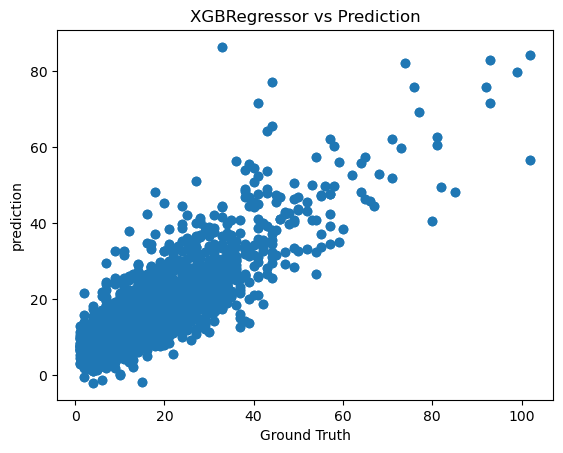

In [82]:
plt.scatter(Y_test,Y_pred_xgbr)
plt.title("XGBRegressor vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("prediction")
plt.show()


## Hyperparameter Tunning for XGBoost Regressor

In [83]:
from sklearn.model_selection import RandomizedSearchCV


import time
start_time = time.time()

params ={'max_depth': [3,5,6,10,15,20],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'subsample': np.arange(0.5,1.0,0.1),
        'colsample_bytree': np.arange(0.4,1.0,0.1),
        'colsample_bylevel': np.arange(0.4,1.0,0.1),
        'n_estimators': [100,500,1000]}




In [85]:
xgbr =XGBRegressor(seed=20)
rscv = RandomizedSearchCV(estimator=xgbr,
                         param_distributions =params,
                         scoring = 'neg_mean_squared_error',
                         n_iter = 25,
                          cv =5,
                         verbose =1)
rscv.fit(X_train,Y_train)
Y_pred_xgbr_random = rscv.predict(X_test)
get_metrics (Y_test,Y_pred_xgbr_random,"XGBRegressor with Best Parameters")
print("time taken to training using randomize search:", time.time()-start_time)
print("Best parameters:", rscv.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBRegressor with Best Parameters : ['MSE': 49.258, 'RMSE' :7.018,'MAE' :5.26, 'R2': 0.664]
time taken to training using randomize search: 1516.284324169159
Best parameters: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7999999999999999}


## from the above testing,it can be said that XGBoost Regressor has performed  the best among other models.